# Google Play Store Data Cleaning Project


#### By: Lalith Sagar M


#### Libraries: Pandas, NumPy, Matplotlib, Seaborn, missingno

### Project Overview:

In this project, we aim to perform data cleaning on a Google Play Store dataset. The dataset contains information about various apps available on the Google Play Store, including details like app names, categories, ratings, reviews, and more. The goal is to prepare the data for further analysis and visualization by addressing missing values, handling duplicates, and ensuring consistency in the dataset.

### Project Objectives:

#### 1. Data Loading and Exploration:

- Load the Google Play Store dataset into a Pandas DataFrame.
- Initial Exploration:
- Check for the presence of missing values, duplicates, and outliers.

#### 2. Data Cleaning(Preprocessing):

- Address missing values
- Handle duplicates
- Standardize data types
- Address outliers if any
- Check for consistency in categorical data (e.g., categories, genres).
- Standardize values for better analysis.

#### 3. Data Transformation:
- Transform relevant columns for easier analysis (e.g., converting strings to numerical formats).

#### 4. Final Dataset:
- Produce a clean and well-structured dataset ready for analysis.


#### Libraries: Pandas, NumPy, Matplotlib, Seaborn (for visualization)


## In this project ive decided to go through each columns sequentially and apply data cleaning best practices 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import chardet

In [2]:
#Detecting the encoding of the file
with open(r"C:\Users\lalit\OneDrive\Courses\python\Pandas reading files\Google PlayStore Data.csv", 'rb') as f:
    result = chardet.detect(f.read())

#Print the detected encoding
print(result['encoding'])

#Read the CSV file with the detected encoding
df = pd.read_csv(r"C:\Users\lalit\OneDrive\Courses\python\Pandas reading files\Google PlayStore Data.csv", encoding=result['encoding'])

Windows-1252


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Free,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


To start the exploration into the dataset, first we can use the info function to check the structure of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

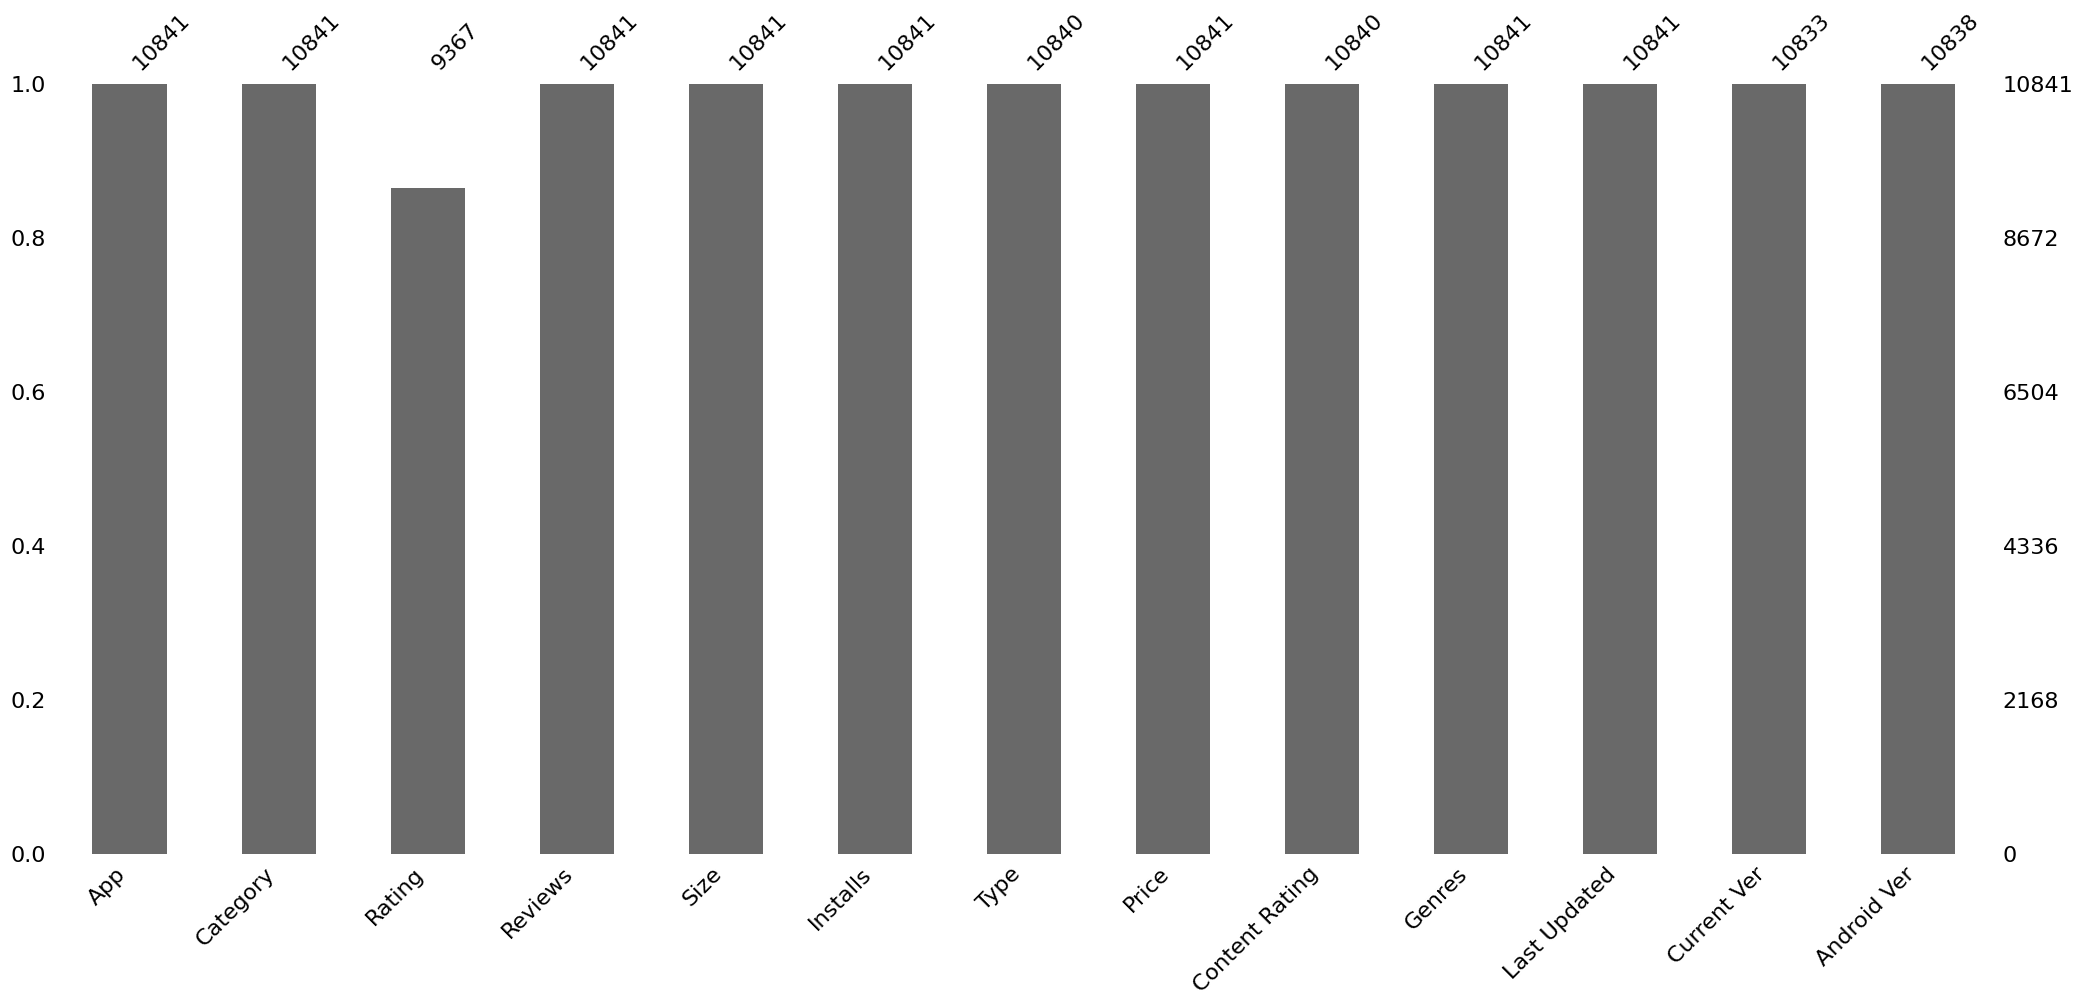

In [4]:
#Checking df for missing values or null values using inofo() and basic visualization
df.info()
msno.bar(df)

##### Found many null values for Ratings, we can check this column and clean this up

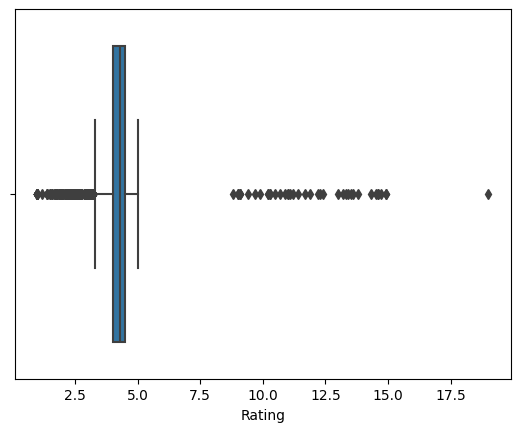

In [6]:
#Lets visualize Rating column values as boxplot
#df["Rating"].plot(kind='box',vert=False)
sns.boxplot(x=df['Rating'])
plt.show()

In [7]:
#Checking number of NaN Values in Rating
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

#### Focusing on the 'Ratings' column first
##### There is many ratings above 5,  Playstore ratings are usually 1 to 5. Since Ratings above 5 are invalid lets fix this in few steps,
first we can convert all the ratings above 5 to Nan

In [8]:
#Changing all the ratings above 5 to NaN 
df.loc[df["Rating"]>5,'Rating']=np.nan

In [9]:
df.isna().sum().sort_values(ascending=False)

Rating            1515
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [10]:
df[df["Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,07-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,08-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,02-Feb-18,1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


##### We can use average of entire Rating column and replace the Nan values in the 'Ratings' Column

In [11]:
#Since 1515 rows in Ratings have 'Nan', we can change all the NaN and replace it with the mean of the 'Ratings' column 
df['Rating'].mean()

4.197726785331332

In [12]:
#Using fillna() to replace all 'Nan' to mean rating value of 4.19
df["Rating"].fillna(df['Rating'].mean(), inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Free,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


##### Among our dataset of almost 11000 Applications, only 13 have NaN values left for any columns, this is inconsequential number and can be removed without affecting furthor analysis

In [13]:
#Removing these 13 rows with NaN values 
df.isna().sum().sort_values(ascending=True)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Genres            0
Last Updated      0
Type              1
Content Rating    1
Android Ver       3
Current Ver       8
dtype: int64

In [14]:
#Deleting remaming NaN values from data set
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#### Focusing on 'Reviews' Column

##### Reviews column is the number of Reviews and should be integer but the info function says its an object
##### This means there are non-numeric values for Review, we need to find this and change this


**Author Notes:**
- I tried to parse it to numeric using pd.to_numeric(df['Reviews'])
- I found this error -> Unable to parse string "2M" at position 71
- The issue is having 'M' for Million instead of numeric 
- There might be more, I cant fix indivual rows so I found a function 'Coerce' that will change all the places with error
 and convert it to Nan Values, so I am going to create a new column 'Reveiws Numeric' and change all the non-numeric to Nan
- I can later compare the new column 'Reviews Numeric' and the original 'Reviews' column to replace the original values back in numbers without the string M

In [16]:
#Using coerce in new column 'Reveiws Numeric' to replace all values with string attached to Nan
df['Reviews Numeric']=pd.to_numeric(df['Reviews'],errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,Free,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,159.0
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,87510.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,215644.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up,38.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up,4.0
10838,Parkinson Exercices FR,MEDICAL,4.197727,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up,3.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,114.0


In [17]:
# Now we can check for all values that have NaN to identify the rows in 'Reviews' column that are not numeric that have 'M'
df[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,2M,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,11-Jul-18,Varies with device,5.0 and up,NaN
1778,Block Craft 3D: Building Simulator Games For Free,GAME,4.5,1M,57M,"50,000,000+",Free,0,Everyone,Simulation,05-Mar-18,2.10.2,4.0.3 and up,NaN
1781,Trivia Crack,GAME,4.5,6.4M,95M,"100,000,000+",Free,0,Everyone,Trivia,03-Aug-18,2.79.0,4.1 and up,NaN


#####  Only 3 columns have issues but we need a dynamic solution for when maybe many columns have same issue

In [18]:
#Checking strings with 'M' and removing it
new_reviews=pd.to_numeric(df.loc[df["Reviews"].str.contains("M"),"Reviews"].str.replace("M"," "))*1_000_000
new_reviews
   

72      2000000.0
1778    1000000.0
1781    6400000.0
Name: Reviews, dtype: float64

In [19]:
#Now lets assign the new reviews to the original 'Reviews' Column where there is string 'M'
df.loc[df["Reviews"].str.contains("M"),"Reviews"]=new_reviews

In [20]:
#Checking if this worked
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,2000000.0,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,11-Jul-18,Varies with device,5.0 and up,NaN
1778,Block Craft 3D: Building Simulator Games For Free,GAME,4.5,1000000.0,57M,"50,000,000+",Free,0,Everyone,Simulation,05-Mar-18,2.10.2,4.0.3 and up,NaN
1781,Trivia Crack,GAME,4.5,6400000.0,95M,"100,000,000+",Free,0,Everyone,Trivia,03-Aug-18,2.79.0,4.1 and up,NaN


##### Since the non-numeric parts of 'Review' column is dealt with, converting it into a numeric column and dropping the additional column created

In [21]:
# Changing reviews column to numeric and droping the 'Reviews Numeric Column'
df["Reviews"]=pd.to_numeric(df['Reviews'])
df=df.drop("Reviews Numeric",axis=1)

##### Now, Checking for duplicated rows

In [22]:
#Checking duplicatees in 'App' column
df[df.duplicated(subset=['App'],keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,02-Aug-18,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,02-Aug-18,Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,02-Aug-18,Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310.0,38M,"10,000,000+",Free,0,Everyone,Weather,06-Aug-18,Varies with device,Varies with device


#### There are many duplicated applications, so lets keep only one copy of dupilcated apps with most number of Reviews 

In [23]:
#Keeping application with most reviews as it will be the most recent and correct version(First Sorting by app with most reviews on top)
df.sort_values(by=["App","Reviews"],inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.197727,27.0,3.6M,500+,Free,0,Everyone,Sports,07-Oct-17,0.22,4.1 and up
324,#NAME?,COMICS,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,02-Aug-18,5.03,4.1 and up
4541,.R,TOOLS,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,GAME,3.800000,489.0,36M,"10,000+",Free,0,Everyone 10+,Arcade,17-Mar-15,1.0.3.1,4.0 and up
9819,¿Es Vegan?,FOOD_AND_DRINK,4.600000,438.0,1.7M,"10,000+",Free,0,Everyone,Food & Drink,01-Aug-17,2.2.3,3.0 and up
9828,Égalité et Réconciliation,NEWS_AND_MAGAZINES,4.900000,58.0,3.8M,500+,Paid,$2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up
3859,ÖBB Scotty,MAPS_AND_NAVIGATION,4.200000,12572.0,24M,"1,000,000+",Free,0,Everyone,Maps & Navigation,19-Feb-18,5.4 (30),4.0 and up


#### Now that apps and reviews are sorted in ascending values, I can just remove duplicates and keep the last value

In [24]:
#Dropping duplicate applications
df.drop_duplicates(subset=['App'],keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.197727,27.0,3.6M,500+,Free,0,Everyone,Sports,07-Oct-17,0.22,4.1 and up
324,#NAME?,COMICS,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,02-Aug-18,5.03,4.1 and up
4541,.R,TOOLS,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,GAME,3.800000,489.0,36M,"10,000+",Free,0,Everyone 10+,Arcade,17-Mar-15,1.0.3.1,4.0 and up
9819,¿Es Vegan?,FOOD_AND_DRINK,4.600000,438.0,1.7M,"10,000+",Free,0,Everyone,Food & Drink,01-Aug-17,2.2.3,3.0 and up
9828,Égalité et Réconciliation,NEWS_AND_MAGAZINES,4.900000,58.0,3.8M,500+,Paid,$2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up
3859,ÖBB Scotty,MAPS_AND_NAVIGATION,4.200000,12572.0,24M,"1,000,000+",Free,0,Everyone,Maps & Navigation,19-Feb-18,5.4 (30),4.0 and up


In [25]:
#Checking if any duplicate apps left
df.loc[df.duplicated(subset=['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


##### Focusing on 'Categories' Column

In [26]:
#Checking 'Categories' columns 
df.value_counts('Category')

Category
FAMILY                 1874
GAME                    945
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
PARENTING                60
ART_AND_DESIGN           60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

##### Data within 'Category' column has underscores and is fully capitalized
##### we will remove underscores and then change to First letter caps for all occurances

In [27]:
#Removing underscore and capitalizing first letter.
df['Category']=df['Category'].str.replace("_", " ")
df['Category']=df['Category'].str.capitalize()
df.value_counts('Category')

Category
Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Parenting                60
Art and design           60
Comics                   56
Beauty                   53
Name: count, dtype: int64

#### Focusing on 'Installs' Column
##### Installs column is also assigned objects because it has ',' seperated numbers and '+' at the end ex. 15,000+
#### To standardize this column and change it to numeric we can use Replace

In [28]:
#Using replace to standardize the items within 'Installs' column
df['Installs']=df['Installs'].str.replace("+","").str.replace(",","")
df['Installs']=pd.to_numeric(df['Installs'])

In [29]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3.6M,500,Free,0,Everyone,Sports,07-Oct-17,0.22,4.1 and up
324,#NAME?,Comics,3.500000,115.0,9.1M,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,22M,1000000,Free,0,Everyone,Social,02-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.500000,259.0,203k,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573.0,53M,10000,Free,0,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,Game,3.800000,489.0,36M,10000,Free,0,Everyone 10+,Arcade,17-Mar-15,1.0.3.1,4.0 and up
9819,¿Es Vegan?,Food and drink,4.600000,438.0,1.7M,10000,Free,0,Everyone,Food & Drink,01-Aug-17,2.2.3,3.0 and up
9828,Égalité et Réconciliation,News and magazines,4.900000,58.0,3.8M,500,Paid,$2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up
3859,ÖBB Scotty,Maps and navigation,4.200000,12572.0,24M,1000000,Free,0,Everyone,Maps & Navigation,19-Feb-18,5.4 (30),4.0 and up


#### Focusing on the 'Size' Column
##### The size column needs to be changed to numeric
##### But it has some issues (Some values are in megabytes denoted with 'M' and some in Kilobytes 'K') 
##### There is many 'Varies with device' values as well

In [30]:
df["Size"].sample(15)
df[df['Size'].str.contains('Varies with device')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7338,20 Minuten (CH),News and magazines,3.5,14153.0,Varies with device,1000000,Free,0,Everyone 10+,News & Magazines,03-Aug-18,Varies with device,Varies with device
7330,20 minutes (CH),News and magazines,3.7,4379.0,Varies with device,1000000,Free,0,Teen,News & Magazines,03-Aug-18,Varies with device,Varies with device
3448,2018Emoji Keyboard ?? Emoticons Lite -sticker&gif,Personalization,4.2,115773.0,Varies with device,10000000,Free,0,Everyone,Personalization,22-May-18,Varies with device,4.1 and up
3151,2GIS: directory & navigator,Travel and local,4.5,768833.0,Varies with device,50000000,Free,0,Everyone,Travel & Local,30-Jul-18,Varies with device,Varies with device
4875,30 Day Ab Challenge FREE,Health and fitness,4.3,48253.0,Varies with device,1000000,Free,0,Everyone,Health & Fitness,13-Dec-17,Varies with device,Varies with device


In [31]:
df_copy_1=df.copy()
#df=df_copy_1

In [32]:
#First lets change all the 'Varies with Device' to 0
df['Size']=df['Size'].str.replace("Varies with device","0")
#df=df_copy_1

#### Lets standardize the kilobyte and megabyte values to bytes 
#### (kilobyte to byte = kilobyte*1024) (megabyte to byte = megabyte * (1024*1024))

In [33]:
#creating new series for kilobyte data after making conversion
new_k_to_b=(pd.to_numeric(df.loc[df["Size"].str.contains("k"),"Size"].str.replace("k",""))*1024).astype(str)

#assigning new series back to size column where the condition matches
df.loc[df["Size"].str.contains("k"),"Size"]=new_k_to_b

#creating new series for megabyte data after making conversion
new_m_to_b=(pd.to_numeric(df.loc[df["Size"].str.contains("M"),"Size"].str.replace("M",""))*(1024*1024)).astype(str)

#assigning new series back to size column where the condition matches
df.loc[df["Size"].str.contains("M"),"Size"]=new_m_to_b

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0,Everyone,Sports,07-Oct-17,0.22,4.1 and up
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0,Everyone,Social,02-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,Game,3.800000,489.0,37748736.0,10000,Free,0,Everyone 10+,Arcade,17-Mar-15,1.0.3.1,4.0 and up
9819,¿Es Vegan?,Food and drink,4.600000,438.0,1782579.2,10000,Free,0,Everyone,Food & Drink,01-Aug-17,2.2.3,3.0 and up
9828,Égalité et Réconciliation,News and magazines,4.900000,58.0,3984588.8,500,Paid,$2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up
3859,ÖBB Scotty,Maps and navigation,4.200000,12572.0,25165824.0,1000000,Free,0,Everyone,Maps & Navigation,19-Feb-18,5.4 (30),4.0 and up


In [34]:
#Converting 'Size' column to numeric now
df['Size']=pd.to_numeric(df["Size"])

#### Focusing on 'Price Column'
##### Now Converting Price column to numeric

**Author Notes:**
##### After a little digging I found that price column has 'Free' and Dollar signs which we need to remove first

In [35]:
#Replacing 'Free' and '$'
df['Price']=df['Price'].str.replace('Free','0').str.replace('$','')

In [36]:
df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4014,Learn C Programming (Examples) (OFFLINE),Family,4.300000,43.0,3879731.2,10000,Free,0,Everyone,Education,16-Dec-17,1.0.3,4.1 and up
7715,Crusaders Quest,Family,4.400000,475020.0,72351744.0,5000000,Free,0,Everyone 10+,Role Playing,26-Jul-18,4.7.0.KG,4.1 and up
9710,Superbrothers Sword & Sworcery,Game,4.400000,11023.0,16777216.0,100000,Paid,3.99,Teen,Adventure,26-Jan-18,1.0.20,2.3 and up
8714,Dairy Queen,Food and drink,3.600000,742.0,45088768.0,100000,Free,0,Everyone,Food & Drink,25-Jul-18,2.1.0,4.1 and up
10135,EZ Launcher,Personalization,4.200000,18926.0,3040870.4,1000000,Free,0,Everyone,Personalization,28-Sep-13,0.5.2 beta,2.2 and up
7655,Central Bank and Trust Co.,Finance,4.700000,65.0,12582912.0,5000,Free,0,Everyone,Finance,12-Jun-18,5.9.1.0,5.0 and up
4270,Guess the song of J Balvin,Game,4.197727,28.0,9332326.4,1000,Free,0,Everyone,Trivia,24-Dec-17,1.1,4.1 and up
10426,Strike! Ten Pin Bowling,Sports,4.200000,18584.0,51380224.0,5000000,Free,0,Everyone,Sports,27-Jun-18,1.7.0,4.1 and up
5329,Al Quran Audio (Full 30 Juz),Family,4.700000,7878.0,3774873.6,1000000,Free,0,Everyone,Education,29-May-17,4,2.3 and up
7508,DAILY: Free Classifieds App for Android,Lifestyle,4.100000,5025.0,0.0,500000,Free,0,Mature 17+,Lifestyle,02-Aug-18,Varies with device,Varies with device


In [37]:
#Converting 'Price' column to numeric
df['Price']=pd.to_numeric(df["Price"])

#### Focusing on 'Distribution' Column
##### There are 'Free' apps and 'Paid' apps, lets make sure any app with price>0 is assigned 'Paid'

In [38]:
#df['Distribution']=df['Price'].apply(lambda p:'Paid' if p>0 else 'Free')
df['Distribution']='Free'
df.loc[df['Price']>0,'Distribution']='Paid'
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0.00,Everyone,Sports,07-Oct-17,0.22,4.1 and up,Free
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,02-Aug-18,5.03,4.1 and up,Free
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,Game,3.800000,489.0,37748736.0,10000,Free,0.00,Everyone 10+,Arcade,17-Mar-15,1.0.3.1,4.0 and up,Free
9819,¿Es Vegan?,Food and drink,4.600000,438.0,1782579.2,10000,Free,0.00,Everyone,Food & Drink,01-Aug-17,2.2.3,3.0 and up,Free
9828,Égalité et Réconciliation,News and magazines,4.900000,58.0,3984588.8,500,Paid,2.99,Everyone,News & Magazines,26-May-18,1.1.1,5.0 and up,Paid
3859,ÖBB Scotty,Maps and navigation,4.200000,12572.0,25165824.0,1000000,Free,0.00,Everyone,Maps & Navigation,19-Feb-18,5.4 (30),4.0 and up,Free


#### Focusing on 'Date' Column
##### We need to standardize this column to a datetime format

In [39]:
#To Standardize 'Last Updated' column which is a date column
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%d-%b-%y').dt.strftime('%m/%d/%Y')

In [40]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0.00,Everyone,Sports,10/07/2017,0.22,4.1 and up,Free
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,07/13/2018,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,08/02/2018,5.03,4.1 and up,Free
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0.00,Everyone,Tools,09/16/2014,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,07/03/2018,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,¡Ay Metro!,Game,3.800000,489.0,37748736.0,10000,Free,0.00,Everyone 10+,Arcade,03/17/2015,1.0.3.1,4.0 and up,Free
9819,¿Es Vegan?,Food and drink,4.600000,438.0,1782579.2,10000,Free,0.00,Everyone,Food & Drink,08/01/2017,2.2.3,3.0 and up,Free
9828,Égalité et Réconciliation,News and magazines,4.900000,58.0,3984588.8,500,Paid,2.99,Everyone,News & Magazines,05/26/2018,1.1.1,5.0 and up,Paid
3859,ÖBB Scotty,Maps and navigation,4.200000,12572.0,25165824.0,1000000,Free,0.00,Everyone,Maps & Navigation,02/19/2018,5.4 (30),4.0 and up,Free


## Conclusion

After conducting a comprehensive data cleaning process on the Google Play Store dataset, the project has successfully addressed various issues such as missing values, duplicate entries, and inconsistent data formats. The cleaned dataset now provides a more accurate and reliable foundation for subsequent analysis. Insights gained from the cleaned data may include a clearer understanding of Reviews, User Ratings, and other relevant factors, enabling more informed decision-making for future analysis or application development within the Google Play Store ecosystem.